In [512]:
import numpy as np
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
import statistics
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from   statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import f, shapiro, levene, f_oneway
from   scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2
import copy 
from pylab import rcParams



# 1.Explore the dataset and extract insights using Exploratory Data Analysis.

# Import DataSet

### Read DataSet

In [513]:
mydata = pd.read_csv('AxisInsurance-1.csv')
mydata.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [514]:
mydata.describe()



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [515]:
mydata.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Change object datatype to category 

In [516]:

mydata['sex'] = mydata.sex.astype('category')
mydata['smoker'] = mydata.smoker.astype('category')
mydata['region'] = mydata.region.astype('category')


In [517]:
mydata.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


### Find mean,standard deviation,25%,50%,75%,min and max 

In [518]:
mydata.describe(include='all')



,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# Find null value

In [519]:
mydata.isnull().sum()



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null value in the dataset

In [520]:
mydata.region.value_counts()



southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [521]:
mydata.smoker.value_counts()



no     1064
yes     274
Name: smoker, dtype: int64

In [522]:
mydata.children.value_counts()



0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [523]:
df = (mydata.groupby('region').describe().unstack().unstack(1))
df


count          mean           std        min          25%  \
         region                                                                 
age      northeast  324.0     39.268519     14.069007    18.0000    27.000000   
         northwest  325.0     39.196923     14.051646    19.0000    26.000000   
         southeast  364.0     38.939560     14.164585    18.0000    26.750000   
         southwest  325.0     39.455385     13.959886    19.0000    27.000000   
bmi      northeast  324.0     29.173503      5.937513    15.9600    24.866250   
         northwest  325.0     29.199785      5.136765    17.3850    25.745000   
         southeast  364.0     33.355989      6.477648    19.8000    28.572500   
         southwest  325.0     30.596615      5.691836    17.4000    26.900000   
children northeast  324.0      1.046296      1.198949     0.0000     0.000000   
         northwest  325.0      1.147692      1.171828     0.0000     0.000000   
         southeast  364.0      1.049451      1.177276     0.0000     0.000000   
         southwest  325.0      1.141538      1.275952     0.0000     0.000000   
charges  northeast  324.0  13406.384516  11255.803066  1694.7964  5194.322288   
         northwest  325.0  12417.575374  11072.276928  1621.3402  4719.736550   
         southeast  364.0  14735.411438  13971.098589  1121.8739  4440.886200   
         southwest  325.0  12346.937377  11557.179101  1241.5650  4751.070000   

                             50%          75%          max  
         region                                             
age      northeast     39.500000     51.00000     64.00000  
         northwest     39.000000     51.00000     64.00000  
         southeast     39.000000     51.00000     64.00000  
         southwest     39.000000     51.00000     64.00000  
bmi      northeast     28.880000     32.89375     48.07000  
         northwest     28.880000     32.77500     42.94000  
         southeast     33.330000     37.81250     53.13000  
         southwest     30.300000     34.60000     47.60000  
children northeast      1.000000      2.00000      5.00000  
         northwest      1.000000      2.00000      5.00000  
         southeast      1.000000      2.00000      5.00000  
         southwest      1.000000      2.00000      5.00000  
charges  northeast  10057.652025  16687.36410  58571.07448  
         northwest   8965.795750  14711.74380  60021.39897  
         southeast   9294.131950  19526.28690  63770.42801  
         southwest   8798.593000  13462.52000  52590.82939

# Perform EDA

## univariate analysis 

In [529]:
def plot_mean_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    
    return plt.figure

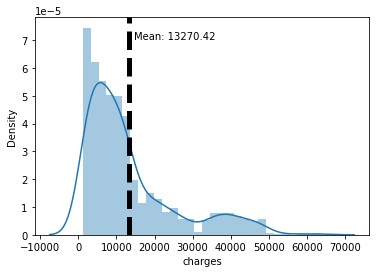

In [530]:
plot_mean_distribution(mydata["charges"]);

In [531]:
def plot_distribution(inp,bins=None):
    
    plt.figure(figsize=(20,10))
    f2, (box,hist) = plt.subplots(nrows = 2, 
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.25, .75)})
    sns.boxplot(inp, ax=box, showmeans=True, color='violet') 
    sns.distplot(inp, kde=F, ax=hist,bins=bins,palette="winter") if bins else sns.distplot(inp, kde=False, ax=hist) 
    hist.axvline(np.mean(inp), color='green', linestyle='--') 
    hist.axvline(np.median(inp), color='black', linestyle='-') 

## Observation on Charges 

<Figure size 1440x720 with 0 Axes>

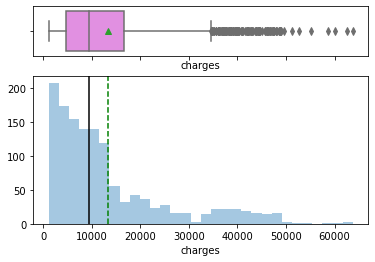

In [532]:
plot_distribution(mydata["charges"]);

The distribution of charges is right skewed.
There are a many outliers in this variable.
From boxplot we can see that the  means 75% of customers are below the claimed  chagrges of 14000(approximately).

## Observation on Age 

<Figure size 1440x720 with 0 Axes>

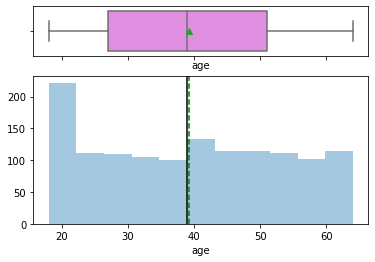

In [533]:
plot_distribution(mydata["age"]);

There is no outliers.
maximum number of person are in the age(less than 20)

## Observation on Children

<Figure size 1440x720 with 0 Axes>

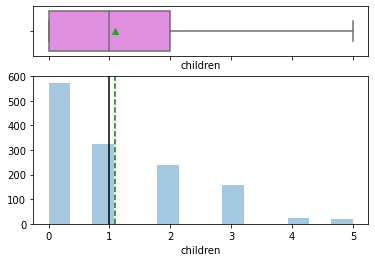

In [534]:
plot_distribution(mydata["children"]);

children is right skewed.
There are no outliers.
Maximum people don't have kids.

## Observation on Bmi 

<Figure size 1440x720 with 0 Axes>

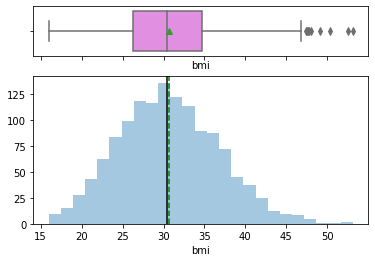

In [535]:
plot_distribution(mydata["bmi"]);

Bmi is normally distributed.
It have some outliers.
Healthy bmi range for people 18.5 to 24.9
majority of people are in the 30 bmi range. 

## Observation on region 

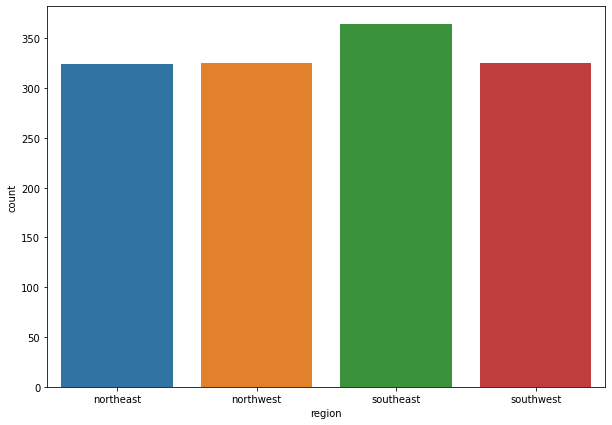

In [536]:
plt.figure(figsize=(10,7))
ax = sns.countplot(mydata['region'])


It slightly higher in southeast region.
Instances are distributed evenly across all regions.

## Observation on smoker 

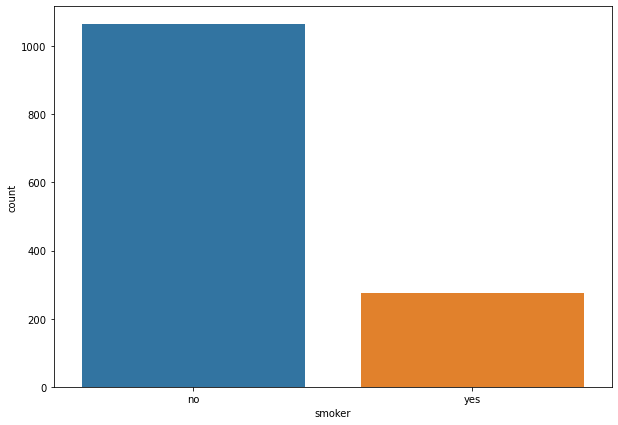

In [537]:
plt.figure(figsize=(10,7))
sns.countplot(mydata['smoker']);


There are less smokers than non smokers.

## Observation on sex 

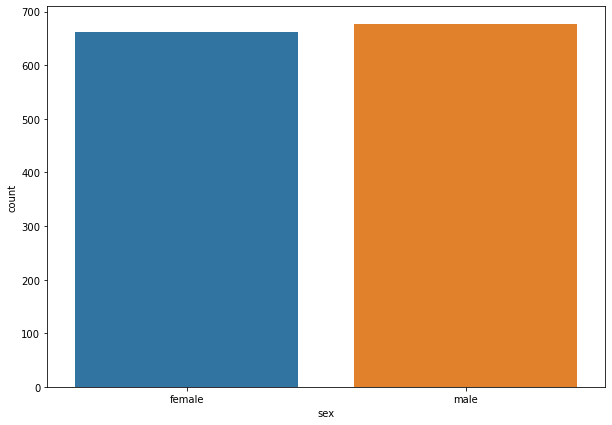

In [538]:
plt.figure(figsize=(10,7))
ax = sns.countplot(mydata['sex'])



There is not much difference between number of male and female.

## Detailed age vise split value of the people

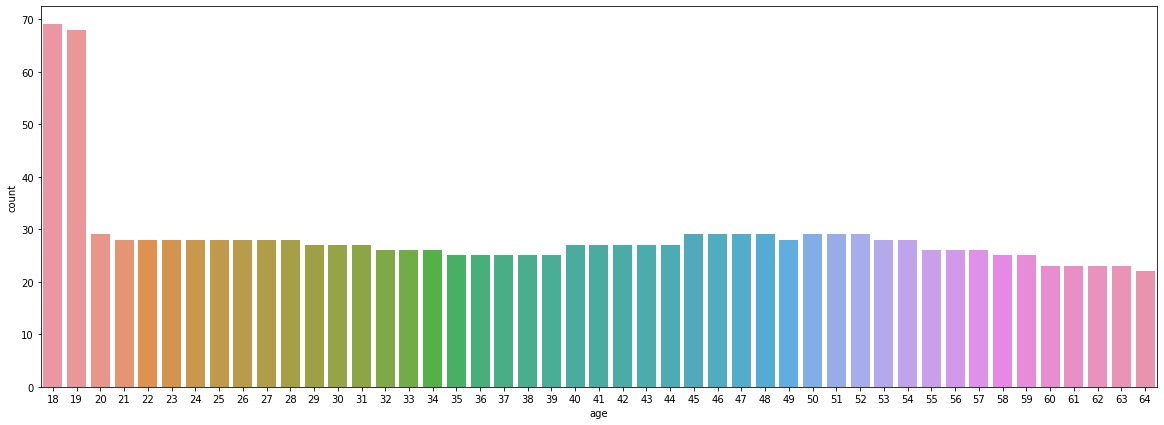

In [539]:
plt.figure(figsize=(20,7))
ax = sns.countplot(mydata['age'])



# Bivariate analysis

## Age Vs Smoker 

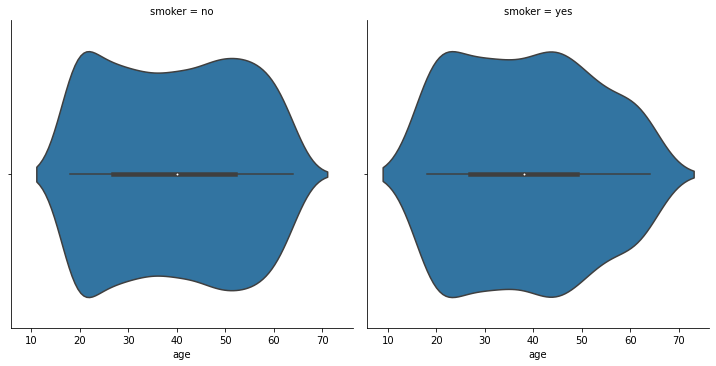

In [540]:
sns.catplot(x = 'age', col = 'smoker', data = mydata, col_wrap = 3, kind="violin");


majority of smokers are 18-20 ages and 43.

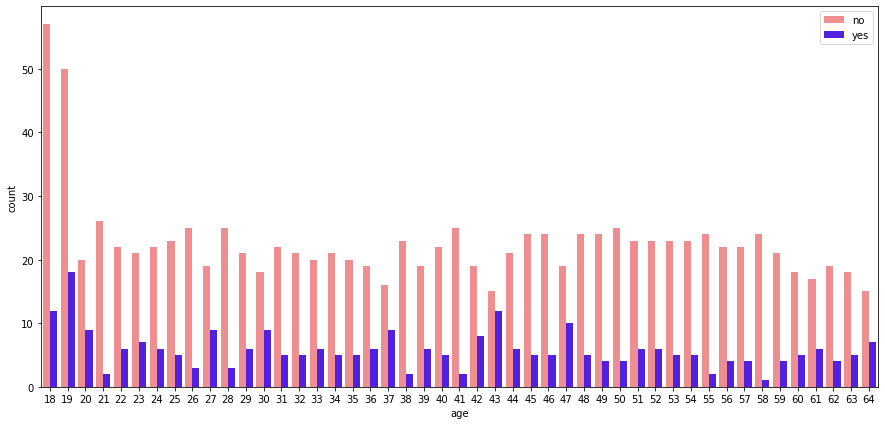

In [541]:
plt.figure(figsize=(15,7))
sns.countplot(mydata["age"],hue=mydata["smoker"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

## Sex Vs Smoker  

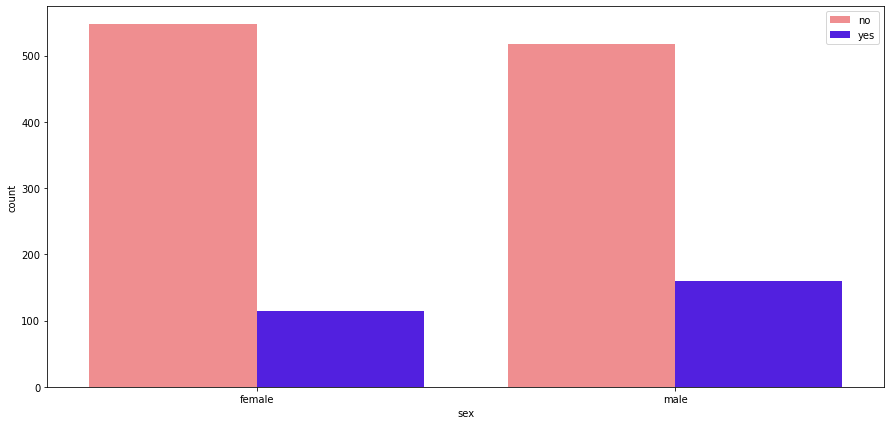

In [542]:
plt.figure(figsize=(15,7))
sns.countplot(mydata["sex"],hue=mydata["smoker"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()


Majority of the people are non smokers.
Male smokers are comparatively higher than female smokers.

## Smoker Vs Charges 

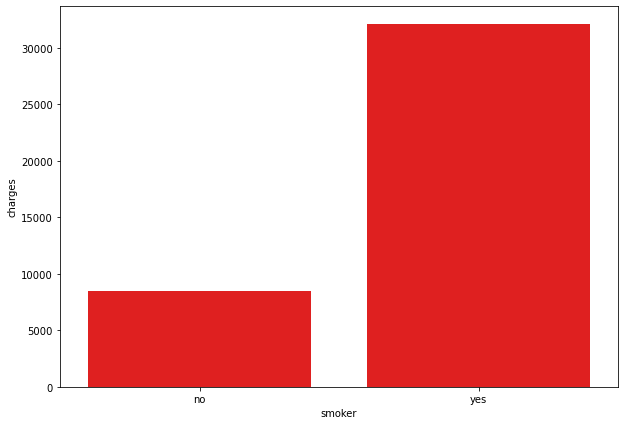

In [543]:
plt.figure(figsize=(10,7));
sns.barplot(x="smoker", y="charges",ci=0,data=mydata,color="RED");



Smokers pay higher medical costs billed by health insurance than the non-smokers.
This indicates that the smoker's health risk are higher.

## Smoker Vs Children 

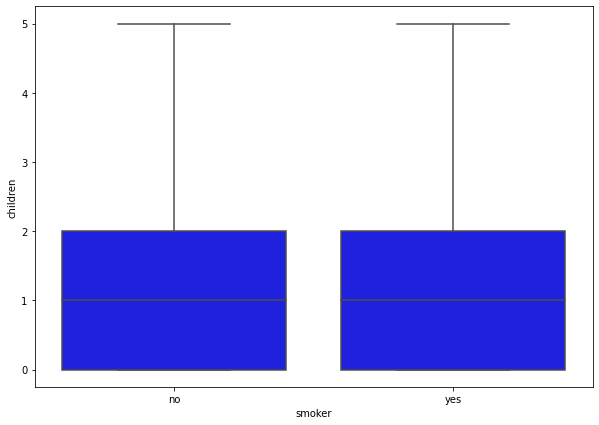

In [544]:
plt.figure(figsize=(10,7));
sns.boxplot(x="smoker", y="children",data=mydata,color="b");



There is no relation between children and smoking.

## Smoker Vs Bmi 

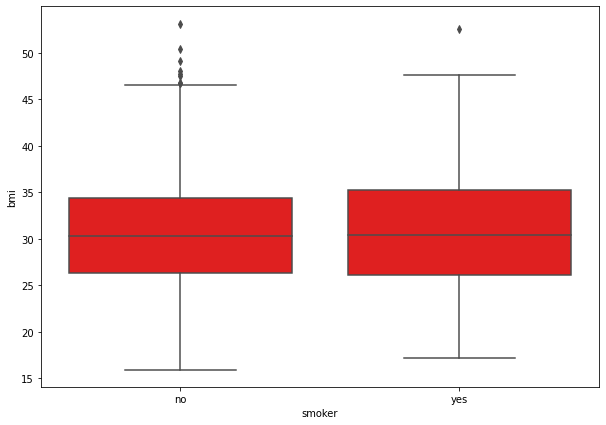

In [545]:
plt.figure(figsize=(10,7));
sns.boxplot(x="smoker", y="bmi",data=mydata,color="r");



Bmi range almost similar for both smokers and non smokers but there is slight increase in the bmi for smokers.
All the people are in the above bmi range.
There are many outliers in non smokers bmi.

## Smoker Vs Age 

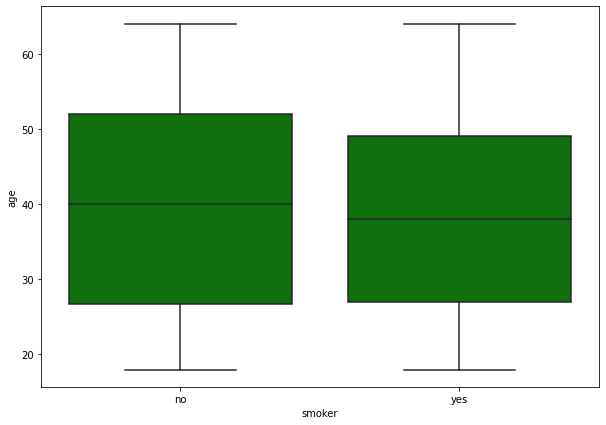

In [546]:
plt.figure(figsize=(10,7));
sns.boxplot(x="smoker", y="age",data=mydata,color="g");



## Age Vs Bmi 

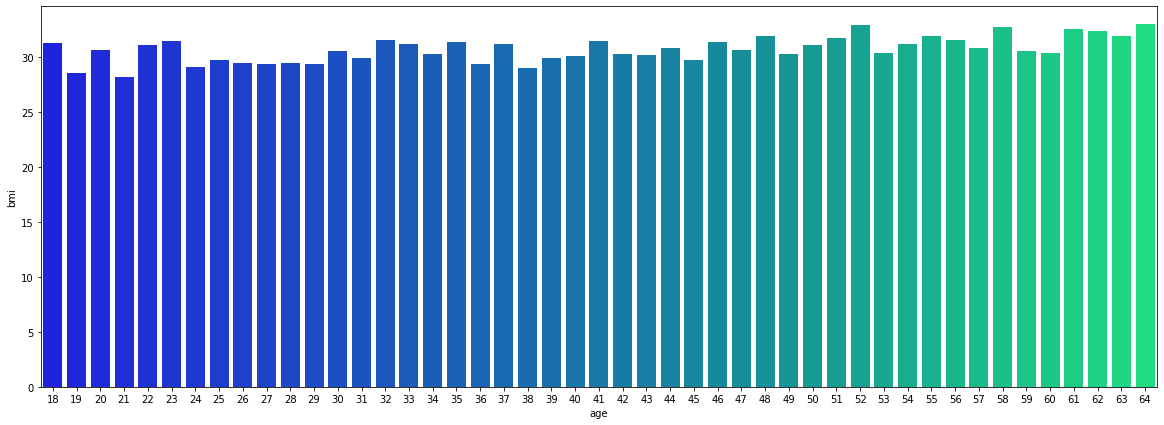

In [547]:
plt.figure(figsize=(20,7));
sns.barplot(x="age", y="bmi",ci=0,data=mydata,palette='winter');



Approximately all the kinds of age people have similar bmi range.

## Region Vs Bmi 

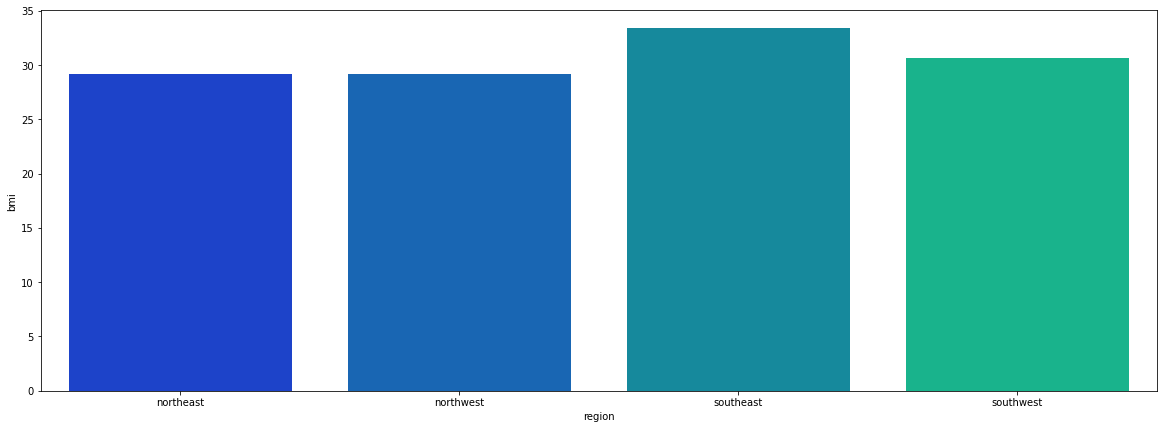

In [548]:
plt.figure(figsize=(20,7));
sns.barplot(x="region", y="bmi",ci=0,data=mydata,palette='winter');



people in the southeast region have slighty increased bmi.

## Age Vs Charges 

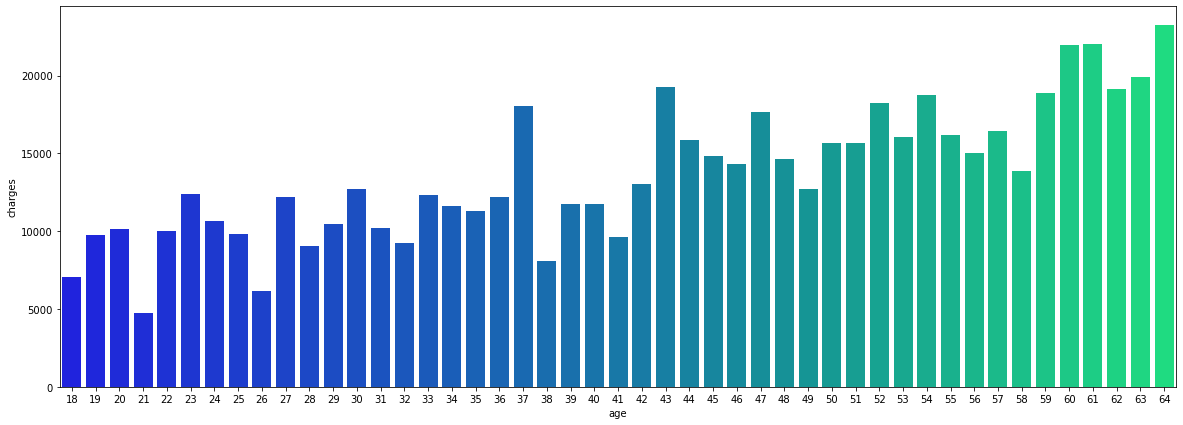

In [549]:
plt.figure(figsize=(20,7));
sns.barplot(x="age", y="charges",ci=0,data=mydata,palette='winter');



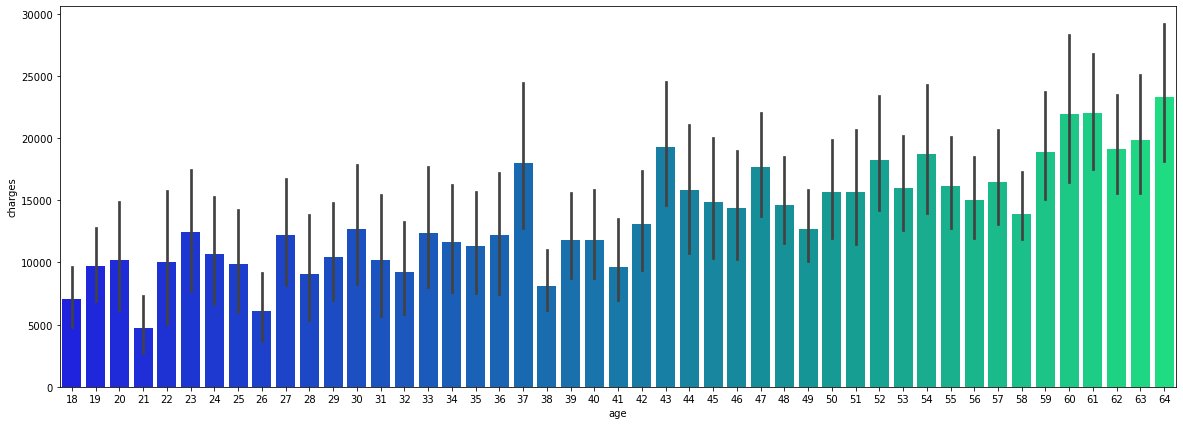

In [447]:
plt.figure(figsize=(20,7));
sns.barplot(x="age", y="charges",data=mydata,palette='winter');



There is gradual increase in the insurance claim with increase in age.

## Sex Vs Bmi 

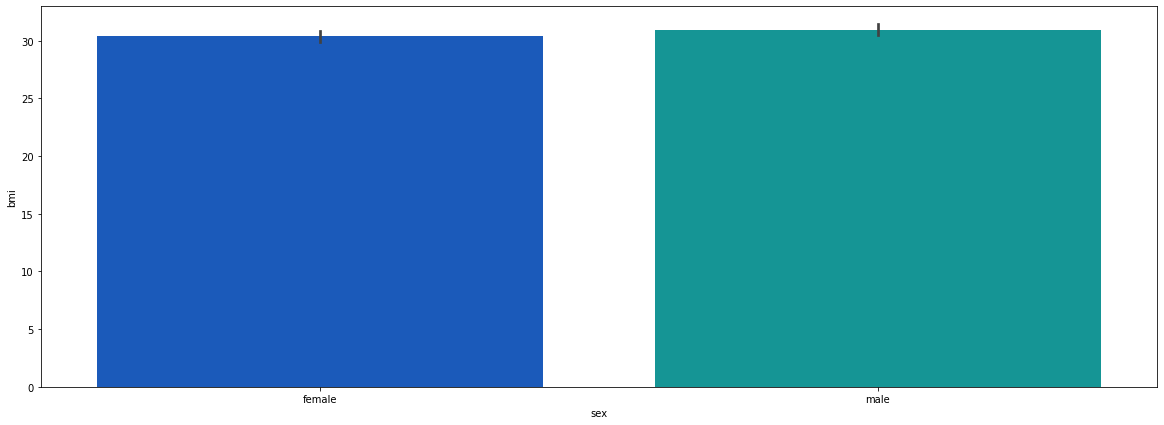

In [550]:
plt.figure(figsize=(20,7));
sns.barplot(x="sex", y="bmi",data=mydata,palette='winter');



There is slight increase in male bmi range compare to female .  

## Sex Vs charges 

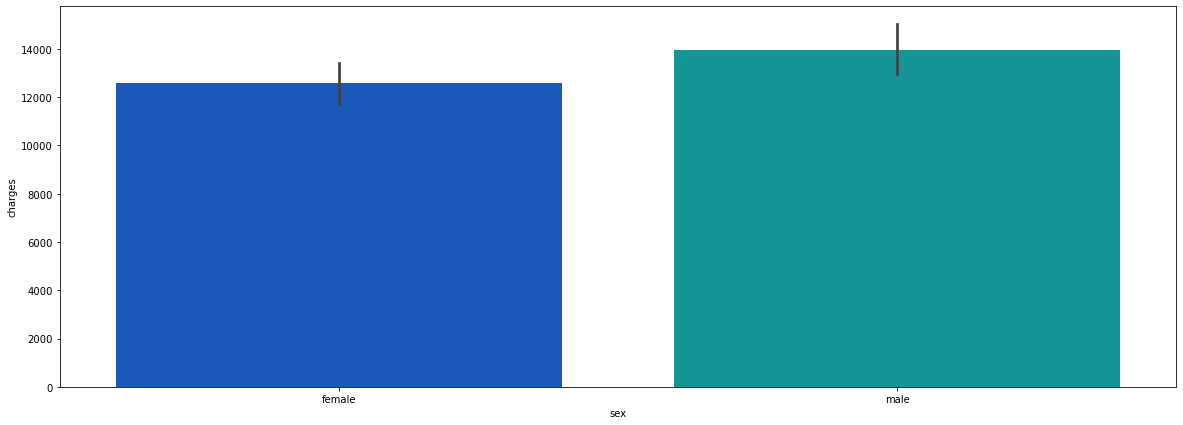

In [551]:
plt.figure(figsize=(20,7));
sns.barplot(x="sex", y="charges",data=mydata,palette='winter');



Male claim insurance amount are higher than female.

## Children Vs Bmi 

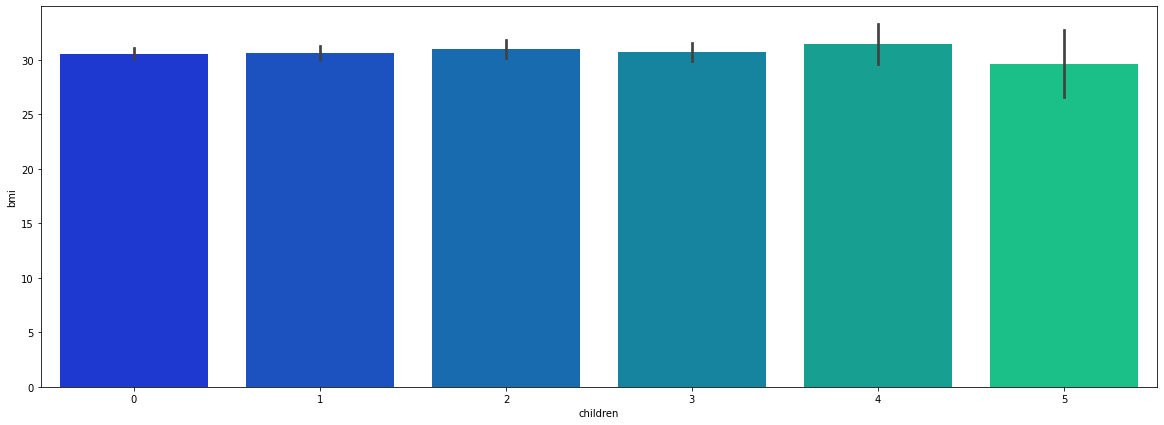

In [552]:
plt.figure(figsize=(20,7));
sns.barplot(x="children", y="bmi",data=mydata,palette='winter');



Number of children does not make any chage in the bmi value.
No relationship can be established between these two variables.

## Region Vs Charges Vs Smoker 

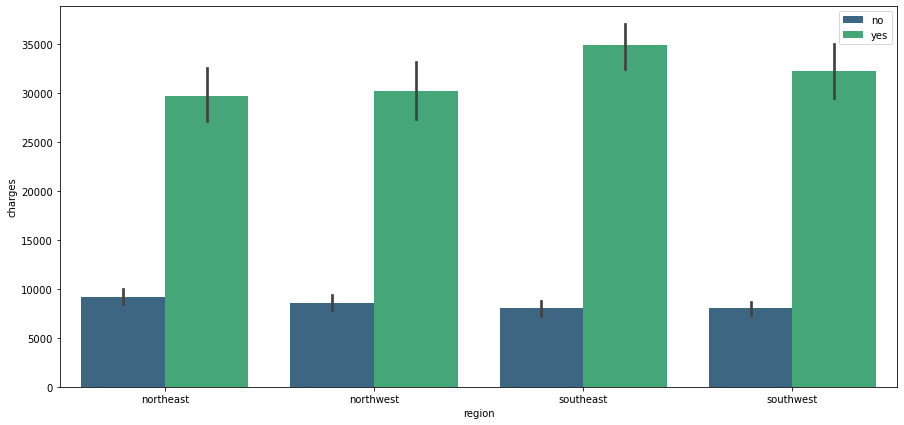

In [553]:
plt.figure(figsize=(15,7))
sns.barplot(mydata["region"],mydata["charges"],hue=mydata["smoker"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()


Pople who claim increased insurance amount who are also smokers are comparatively higher in south region (east and west)than in north(east and west).South east region being the highest in both smokers as well insurance claim amount.

## Region Vs Bmi Vs Sex 

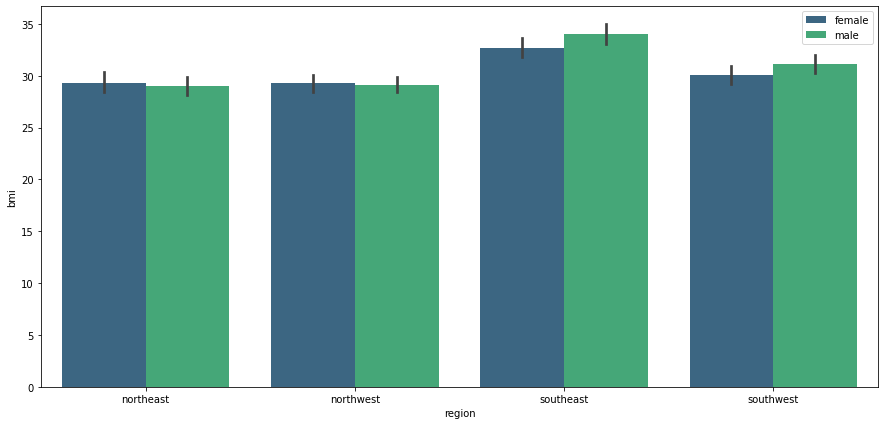

In [554]:
plt.figure(figsize=(15,7))
sns.barplot(mydata["region"],mydata["bmi"],hue=mydata["sex"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()



All the region people not in the correct bmi.The normal bmi range is 18.5 to 24.9.

## Children Vs Bmi Vs Sex 

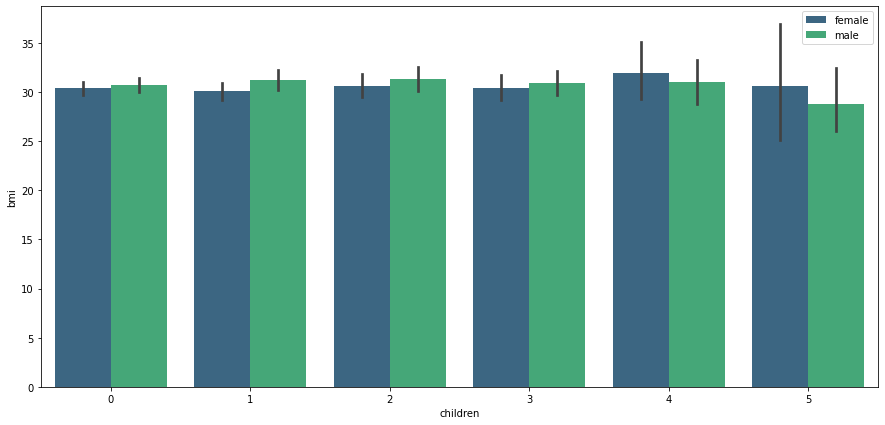

In [555]:
plt.figure(figsize=(15,7))
sns.barplot(mydata["children"],mydata["bmi"],hue=mydata["sex"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

# Answer the following questions with statistical evidence


#  2. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

# One-way ANOVA 

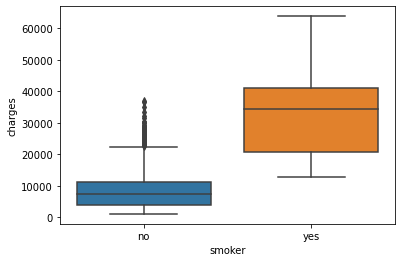

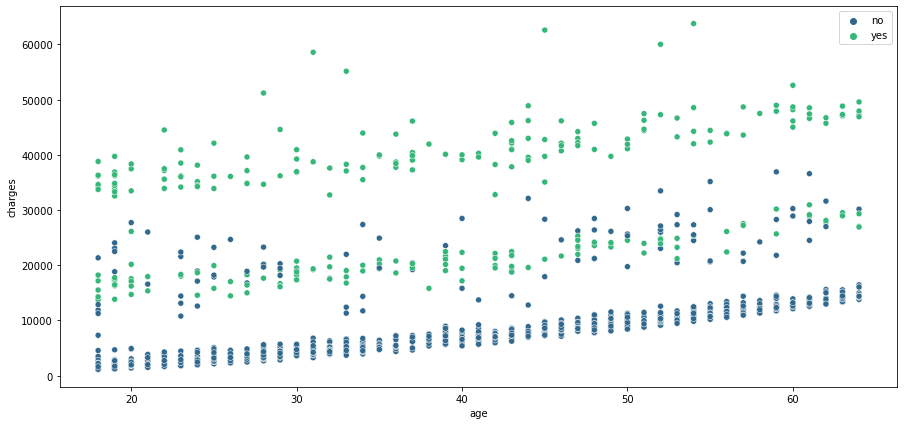

In [557]:
sns.boxplot(x="smoker", y="charges", data=mydata);
plt.figure(figsize=(15,7))
sns.scatterplot(mydata["age"],mydata["charges"],hue=mydata["smoker"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()




In [558]:
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"
mod = ols('charges ~ smoker', data = mydata).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)



                sum_sq      df            F         PR(>F)
smoker    1.215199e+11     1.0  2177.614868  8.271436e-283
Residual  7.455432e+10  1336.0          NaN            NaN


In [559]:
sum1 = 'charges ~ C(smoker)'
model = ols(sum1, mydata).fit()
ano_table = sm.stats.anova_lm(model)
print(ano_table)



               df        sum_sq       mean_sq            F         PR(>F)
C(smoker)     1.0  1.215199e+11  1.215199e+11  2177.614868  8.271436e-283
Residual   1336.0  7.455432e+10  5.580413e+07          NaN            NaN


Since the p value is lesser than  𝛼 (0.05), we can conclude that we reject the Null Hypothesis ( 𝐻0).

In [240]:
mydata.charges.groupby(mydata.smoker).mean()



smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

## Using f_oneway 

In [241]:
yes=mydata[mydata.smoker=='yes']
no=mydata[mydata.smoker=='no']


In [242]:
f_oneway(yes.charges,no.charges)


F_onewayResult(statistic=2177.614868056519, pvalue=8.271435842182967e-283)

## Using Independent T test 

In [305]:
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

In [306]:
x = np.array(mydata[mydata.smoker == 'yes'].charges) 
y = np.array(mydata[mydata.smoker == 'no'].charges)
t, p_value  = stats.ttest_ind(x,y, axis = 0)

print(p_value)

8.271435842177219e-283


Hence p value is lesser than 0.05, so we reject the null hypothesis.Smokers claim  higher insurance amount than the non-smokers.

# 3. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males. 

# One-way ANOVA 

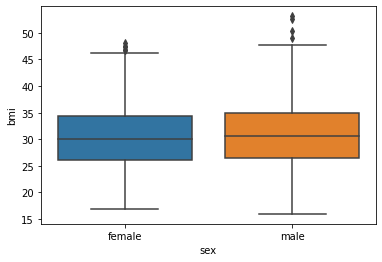

In [560]:
sns.boxplot(x="sex", y="bmi", data=mydata);



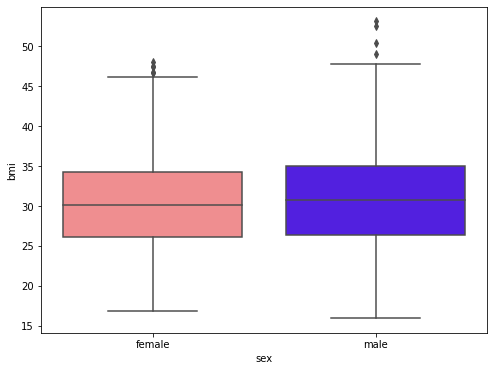

In [475]:
plt.figure(figsize=(8,6))
sns.boxplot(mydata.sex, mydata.bmi ,palette="gnuplot2_r" )
plt.show()

In [561]:
#h0: The  bmi of female is  equal to male. 
#h1: The  bmi of female is not equal to male.
sum2 = 'bmi ~ C(sex)'
model = ols(sum2, mydata).fit()
ano_table = sm.stats.anova_lm(model)
print(ano_table)


              df        sum_sq     mean_sq        F    PR(>F)
C(sex)       1.0    106.912532  106.912532  2.87897  0.089976
Residual  1336.0  49613.287854   37.135695      NaN       NaN


Since the pvalue is > 0.05, therefore, at 95% confidence we fail to reject nullhypothesis(Accepting nullhypothesis) 

In [562]:
mydata.bmi.groupby(mydata.sex).mean()



sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

## Using f_oneway 

In [563]:
male=mydata[mydata.sex=='male']
female=mydata[mydata.sex=='female']


In [564]:
f_oneway(male.bmi,female.bmi)


F_onewayResult(statistic=2.878969506932102, pvalue=0.08997637178992055)

## Using Independent t t-test 

In [311]:
x = np.array(mydata[mydata.sex == 'male'].bmi)  
y = np.array(mydata[mydata.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)



0.08997637178984932


After the statistical analysis  we can conclude that male and female do not have different in bmi.

# 4.Is the proportion of smokers significantly different across different regions?

## Chi_square test 

In [565]:
Ho = "region has no effect on smoking habits" 
Ha = "region has an effect on smoking habits"  
crosstab = pd.crosstab(mydata['smoker'],mydata['region']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value)


0.06171954839170547


In [566]:
alpha=0.05
if p_value>=alpha:
    print("Accept H0,region has no effect on smoking habits ")
else:
    print("Reject H0, region has an effect on smoking habits")
    
    

Accept H0,region has no effect on smoking habits 


# 5.Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

## One way Anova test 

In [567]:
mydata.corr()



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [568]:

mydata.bmi.groupby(mydata.children).mean()



children
0    30.550296
1    30.623148
2    30.978104
3    30.684331
4    31.391200
5    29.605000
Name: bmi, dtype: float64

In [569]:
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

female_df =copy.deepcopy(mydata[mydata['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']
f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)



0.7158579926754841


In [570]:
zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']
levene_stat, levene_p  = levene(zero,one,two, center = 'mean')
print('Statistics = %.2f, p = %.2f' % (levene_stat*100, levene_p*100))

if p > alpha:
    print('We fail to reject the null hypothesis of homogeneity of variances.')
else:
    print('We fail to accept the null hypothesis of homogeneity of variances.')

Statistics = 95.21, p = 38.65
We fail to reject the null hypothesis of homogeneity of variances.


Fail to reject null hypothesis.Hence,the number of children is not effecting any difference in women bmi.
The bmi value of women with no children,one child and two children are the same.

# Insights

The critical interpretations made by analyzing the dataset that had the details of Insurance claim are as follows:

The charges claimed by smokers are higher than non-smokers.
The Proportion of smokers is higher than the non-smokers .